## Problem Statement

### Identify Data repetition pattern within given dataset. 

### Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading Data set

In [3]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


## Data Wrangling

In [5]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


### Change month column into the DateTime data type

In [6]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [7]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


###  Exploratory Data Analysis (EDA)

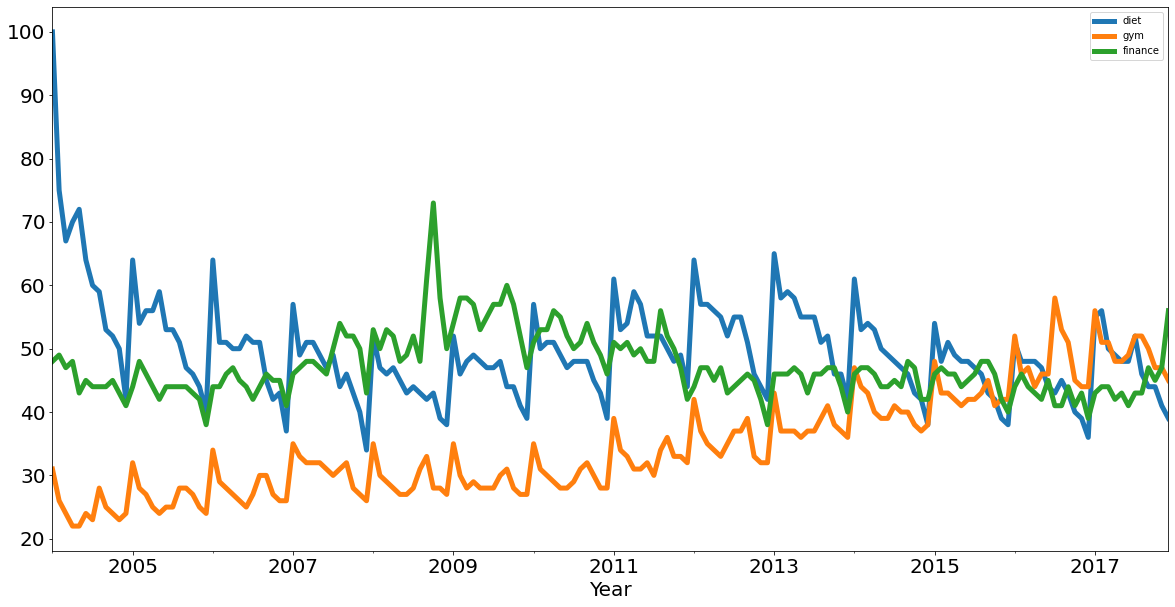

In [8]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Check for Trend 

### 1. For 'diet' variable

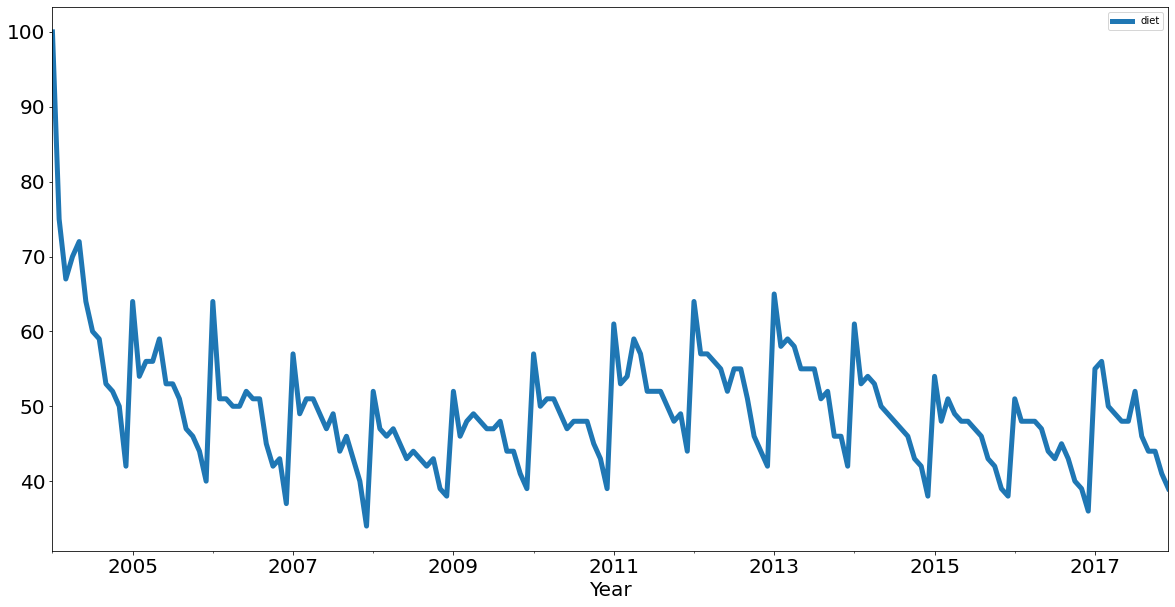

In [9]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### 2. For 'gym' variable

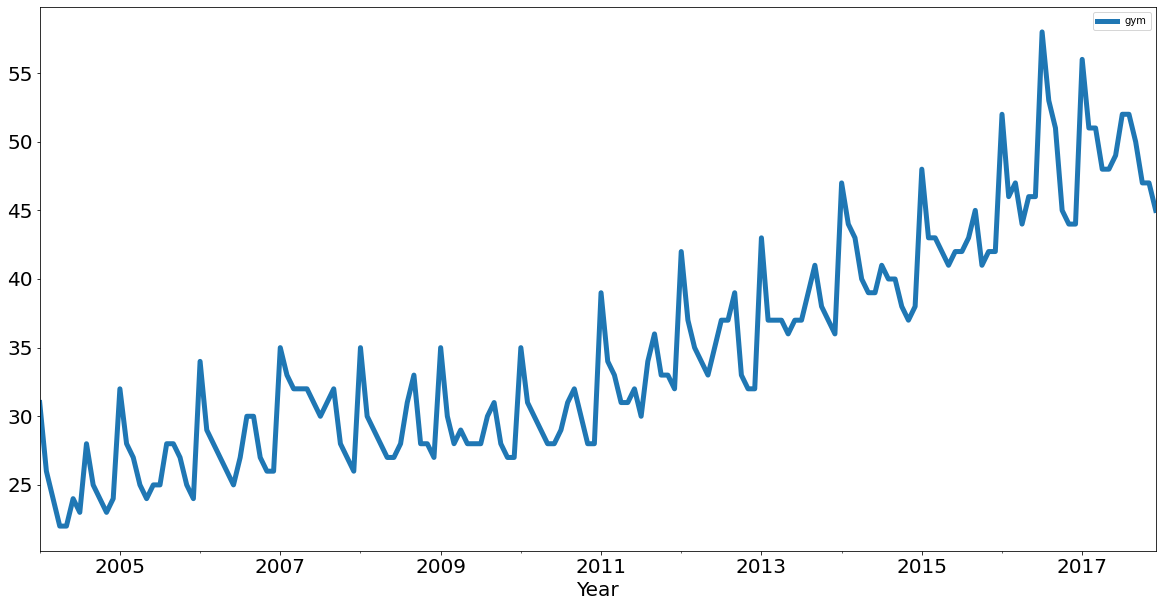

In [10]:
df[['gym']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### The first thing to notice is that there is seasonality: each January, there's a big jump. Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. In other words, it looks like there are trends and seasonal components to these time series.

## Analyzing Seasonality

### Seasonality is the repetition of data at a certain period of time interval. 

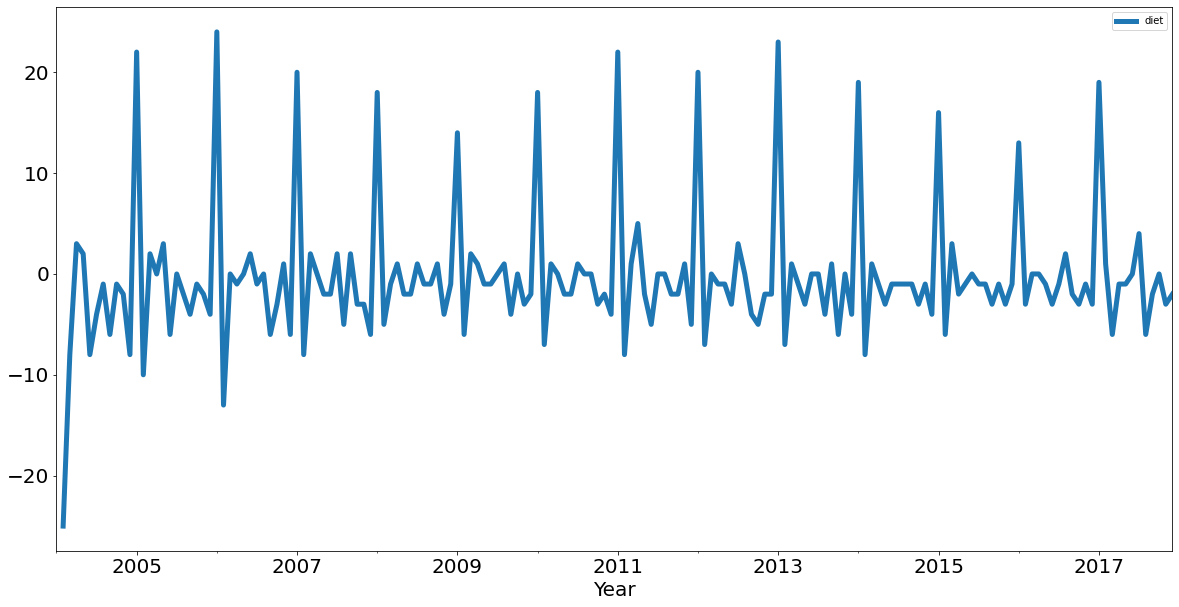

In [11]:
df[['diet']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

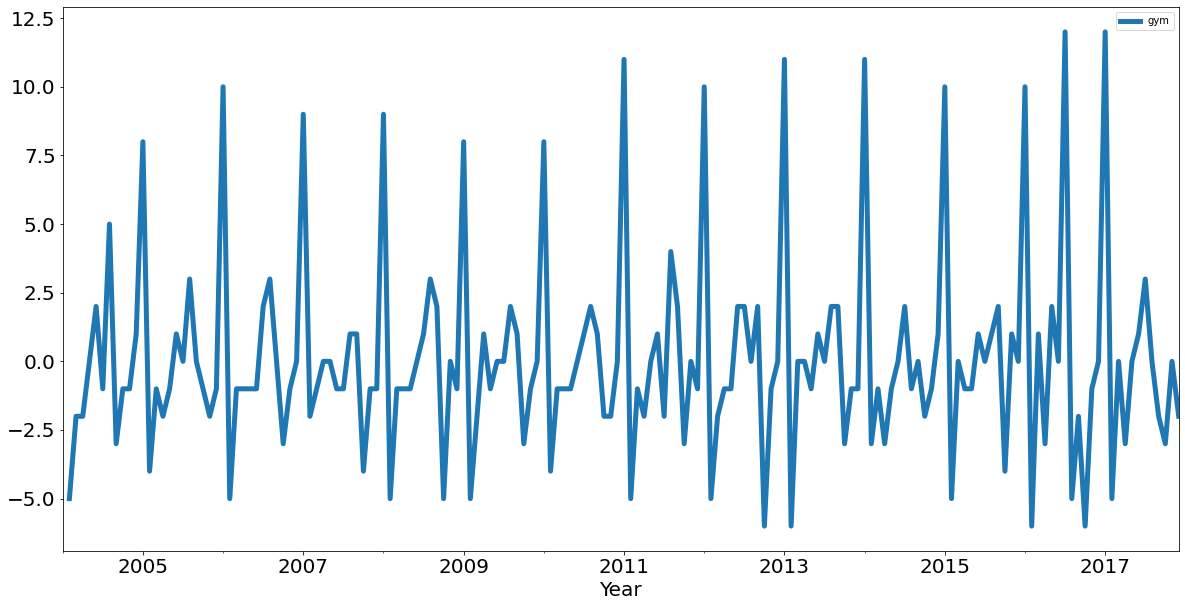

In [12]:
df[['gym']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Seasonal decompose

In [13]:
df1= df[['diet','gym']]
df1.head()

,diet,gym
month,,
2004-01-01,100,31
2004-02-01,75,26
2004-03-01,67,24
2004-04-01,70,22
2004-05-01,72,22


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Diet column

In [34]:
sd = seasonal_decompose(df1['diet'])
sd

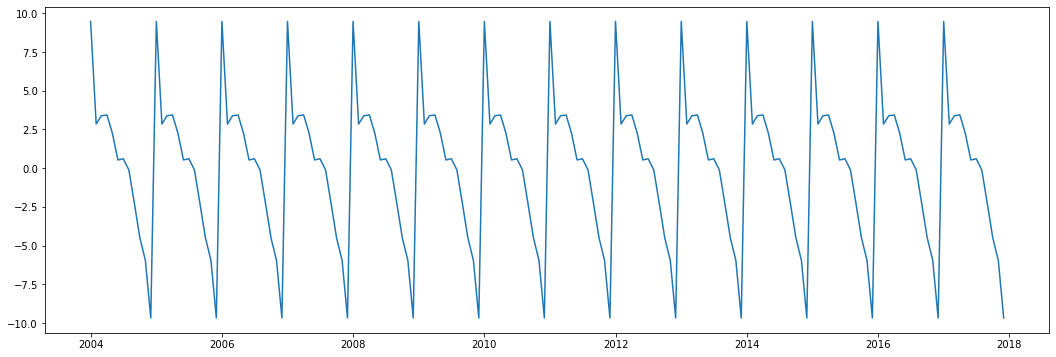

In [35]:
plt.plot(sd.seasonal)

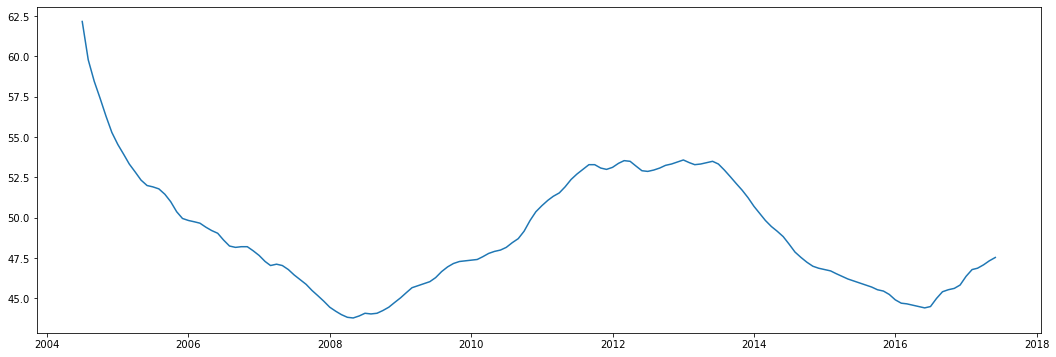

In [36]:
plt.plot(sd.trend)

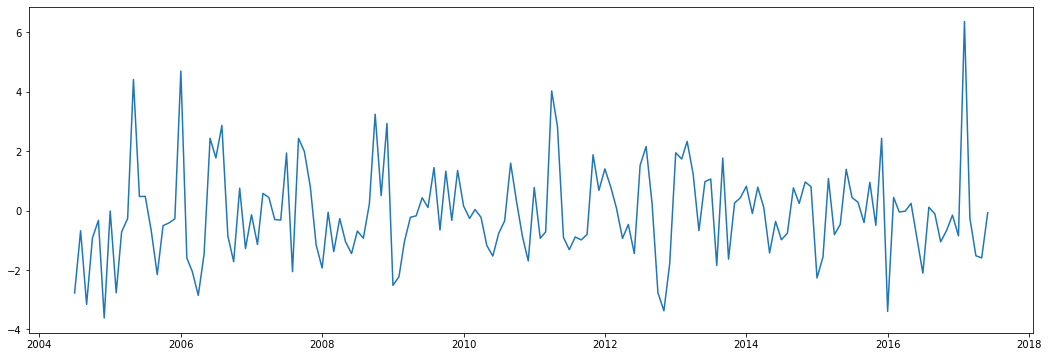

In [37]:
plt.plot(sd.resid)

From the above graph, it is clear that there is a spike at the starting of every year. Which means every year January people tend to take ‘Diet’ as their resolution rather than any other month. This is a perfect example of seasonality.

#### Gym column

In [38]:
decomposition= seasonal_decompose(df1['gym'])

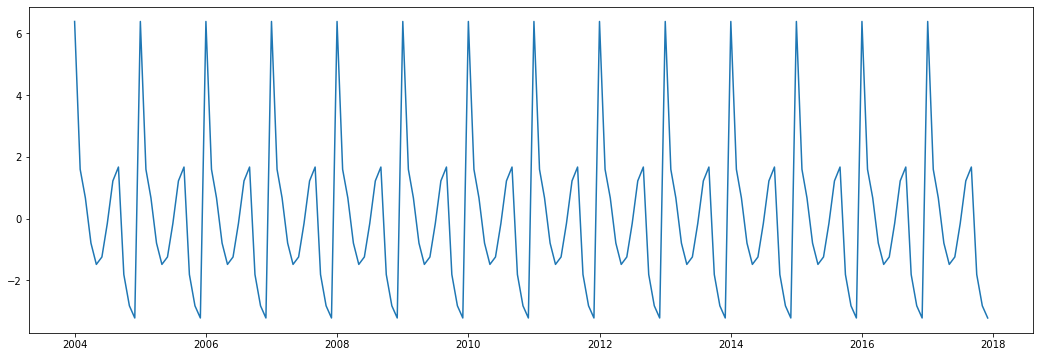

In [39]:
plt.plot(decomposition.seasonal)

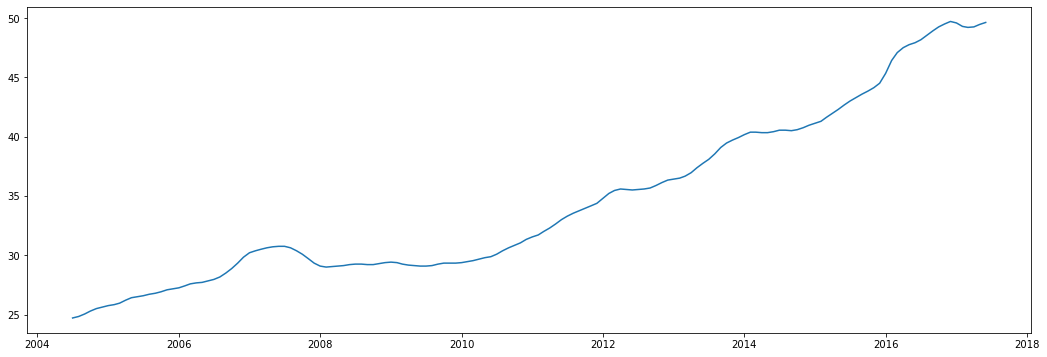

In [40]:
plt.plot(decomposition.trend)

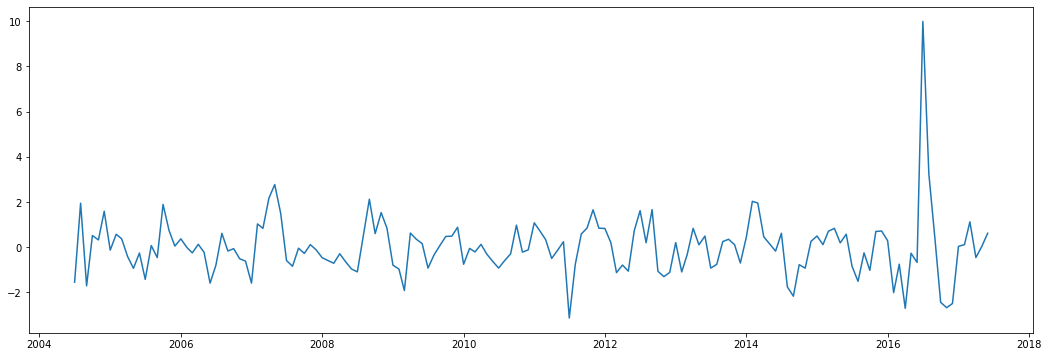

In [41]:
plt.plot(decomposition.resid)

From the above graph, it is clear that there is a spike at the starting of every year. Which means every year January people tend to take ‘Gym’ as their resolution rather than any other month. This is a perfect example of seasonality.